In [2]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base = 'D:/Georgian/ML Frameworks/archive/chest_xray'

train = base + '/train'
test = base + '/test'
val = base + '/val'

normal = train + '/NORMAL'
pneumonia = train + '/PNEUMONIA'

os.listdir(base)

['chest_xray', 'Sample images', 'test', 'train', 'val', '__MACOSX']

NORMAL2-IM-1018-0001.jpeg
Image size :  (2694, 2625, 3)


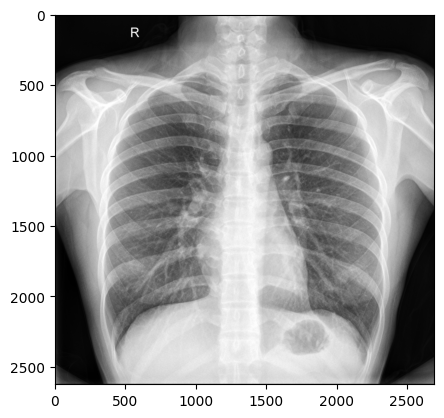

In [4]:
random_img = random.choice(os.listdir(normal))
print(random_img)
img_path = os.path.join(normal, random_img)
img_sample = cv.imread(img_path)
height, width, channels = img_sample.shape
print("Image size : ",(width, height, channels))
plt.figure()
plt.imshow(img_sample)

person600_bacteria_2457.jpeg
Image size :  (1000, 680, 3)


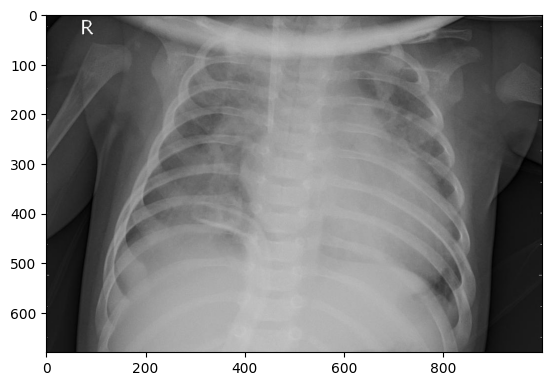

In [5]:
random_img = random.choice(os.listdir(pneumonia))
print(random_img)
img_path = os.path.join(pneumonia, random_img)
img_sample = cv.imread(img_path)
height, width, channels = img_sample.shape
print("Image size : ",(width, height, channels))
plt.figure()
plt.imshow(img_sample)

In [6]:
train_df = []
for img in os.listdir(normal):
    train_df.append((img, 0))

for img in os.listdir(pneumonia):
    train_df.append((img, 1))

train_df = pd.DataFrame(train_df, columns=['images', 'label'],index=None)
train_df

,images,label
0,IM-0115-0001.jpeg,0
1,IM-0117-0001.jpeg,0
2,IM-0119-0001.jpeg,0
3,IM-0122-0001.jpeg,0
4,IM-0125-0001.jpeg,0
...,...,...
5212,person99_virus_183.jpeg,1
5213,person9_bacteria_38.jpeg,1
5214,person9_bacteria_39.jpeg,1
5215,person9_bacteria_40.jpeg,1


In [7]:
shuffled_train_df = train_df.sample(frac=1).reset_index(drop=True)
shuffled_train_df

,images,label
0,IM-0154-0001.jpeg,0
1,person321_bacteria_1483.jpeg,1
2,person1665_bacteria_4415.jpeg,1
3,person1361_virus_2344.jpeg,1
4,person5_bacteria_19.jpeg,1
...,...,...
5212,person730_virus_1351.jpeg,1
5213,person1749_bacteria_4590.jpeg,1
5214,person1503_virus_2613.jpeg,1
5215,person296_bacteria_1393.jpeg,1


In [8]:
fig = go.Figure(
    data=[go.Bar(x=shuffled_train_df['label'],y=shuffled_train_df['images'], marker_color='red')]
)

fig.update_layout(
    title='Bar Graph Example',
    xaxis_title='Categories',
    yaxis_title='Values',
    template='plotly',
)

fig.show()

In [9]:
shuffled_train_df.shape

(5217, 2)

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    'D:/Georgian/ML Frameworks/archive/chest_xray/train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)



Found 5217 images belonging to 2 classes.


In [12]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(
    'D:/Georgian/ML Frameworks/archive/chest_xray/val',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'D:/Georgian/ML Frameworks/archive/chest_xray/test',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


In [14]:
cnn = Sequential()

cnn.add(Conv2D(filters =32,kernel_size=3,activation='relu',input_shape=(64,64,3),padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=1,activation='sigmoid'))

d:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [15]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
cnn.fit(x = training_set,validation_data=val_set,epochs=100)

Epoch 1/100


d:\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



164/164 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.7372 - loss: 0.5904 - val_accuracy: 0.6875 - val_loss: 0.6392
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 261ms/step - accuracy: 0.8723 - loss: 0.2951 - val_accuracy: 0.6875 - val_loss: 0.8886
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 263ms/step - accuracy: 0.9093 - loss: 0.2089 - val_accuracy: 0.7500 - val_loss: 0.5910
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 45s 261ms/step - accuracy: 0.9343 - loss: 0.1796 - val_accuracy: 0.6250 - val_loss: 0.6495
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 253ms/step - accuracy: 0.9401 - loss: 0.1571 - val_accuracy: 0.6250 - val_loss: 0.7774
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - accuracy: 0.9354 - loss: 0.1622 - val_accuracy: 0.6875 - val_loss: 0.6233
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 44s 260ms/step - accuracy: 0.9394 - loss: 0.1515 - val_accuracy: 0.6875 - val_loss: 0.8836
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 46s 269ms/step - accuracy: 0.9423 - loss: 0.1506 

In [17]:
cnn.save('cnn.h5')

In [18]:
train_loss, train_accuracy = cnn.evaluate(training_set, verbose=1)
val_loss, val_accuracy = cnn.evaluate(val_set, verbose=1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - accuracy: 0.9843 - loss: 0.0456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8125 - loss: 0.6136


In [19]:
test_loss, test_accuracy = cnn.evaluate(test_set,verbose=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9032 - loss: 0.5425


In [20]:
print("Training Accuracy: ",train_accuracy)
print("Validation Accuracy: ",val_accuracy)
print("Test Accuracy: ",test_accuracy)

Training Accuracy:  0.9850488901138306
Validation Accuracy:  0.8125
Test Accuracy:  0.9022436141967773
